## 1. Import Libraries
This block imports essential libraries for data manipulation (pandas, numpy), sentiment analysis (TextBlob), statistical correlation (scipy.stats), and visualization (matplotlib, seaborn).

In [13]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load News and Stock Data
Loads the processed news sentiment data and Apple's historical stock data from CSV files. Handles file errors and ensures the required files are present.

In [14]:
try:
    # Load the news csv file
    news_df = pd.read_csv('../../data/processed_analyst_ratings.csv')
    # Load Historical Data
    stock_df = pd.read_csv('../../data/yfinance_data/MSFT_historical_data.csv')
except FileNotFoundError:
    print("File not found. Please ensure the path is correct and the file exists.")
    exit(1)
except Exception as e:
    print(f"An error occurred while reading the parquet file: {e}")
    exit(1)

## 3. Convert Date Columns to Datetime
Converts the date columns in both DataFrames to datetime format for accurate merging and time-based analysis.

In [15]:
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', utc=True)
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='mixed', utc=True)

## 4. Merge News and Stock Data
Merges the news and stock DataFrames on the date columns to align sentiment scores with corresponding stock prices.

In [16]:
merged_df = pd.merge(news_df, stock_df, left_on='date', right_on='Date', how='left')

## 5. Inspect Merged Data
Displays the shape and a sample of the merged DataFrame to verify the merge and inspect the data.

In [17]:
merged_df.shape
merged_df.sample(5)

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
491691,Morning Market Movers,https://www.benzinga.com/news/14/04/4507661/mo...,Monica Gerson,2014-04-29 00:00:00+00:00,CBST,0.0000,2014-04-29 00:00:00+00:00,41.099998,41.189999,40.389999,40.509998,34.180691,29636200,0.0,0.0
201225,CACI Awarded Prime Position on $2.5 Billion Mu...,https://www.benzinga.com/news/11/11/2100632/ca...,Allie Wickman,2011-11-07 00:00:00+00:00,CACI,0.0000,2011-11-07 00:00:00+00:00,26.209999,26.820000,26.129999,26.799999,21.027739,42589700,0.0,0.0
1161938,Shares of several industrial companies are tra...,https://www.benzinga.com/markets/wiim/19/06/13...,Benzinga Newsdesk,2019-06-04 00:00:00+00:00,XYL,0.0625,2019-06-04 00:00:00+00:00,121.279999,123.279999,120.650002,123.160004,117.245819,29382600,0.0,0.0
1190298,31 Stocks Moving In Tuesday's Pre-Market Session,https://www.benzinga.com/news/19/08/14255240/3...,Lisa Levin,2019-08-13 00:00:00+00:00,DRD,0.0000,2019-08-13 00:00:00+00:00,136.050003,138.800003,135.000000,138.600006,131.944397,25154600,0.0,0.0
160450,Robert W. Baird Downgrades Avery Dennison To N...,https://www.benzinga.com/analyst-ratings/downg...,Joe Young,2011-07-19 00:00:00+00:00,AVY,0.0000,2011-07-19 00:00:00+00:00,26.809999,27.639999,26.780001,27.540001,21.472822,86730600,0.0,0.0


## 6. Handle Missing Values
Checks for missing values in the merged DataFrame, drops any rows with missing data, and displays the new shape.

In [19]:
# Check for missing values
print(merged_df['date'].isnull().sum())
merged_df.dropna(inplace=True)  # Drop missing values if necessary
merged_df.shape

0


(1324417, 15)

## 7. Calculate Daily Returns
Calculates the daily stock return as the percentage change in the closing price and adds it as a new column.

In [20]:
merged_df['daily_return'] = merged_df['Close'].pct_change()  # Calculate daily returns
merged_df.head()

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-27 00:00:00+00:00,Y,0.000000,2009-04-27 00:00:00+00:00,20.549999,20.820000,20.280001,20.400000,15.139336,68219600,0.0,0.0,NaN
1,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-27 00:00:00+00:00,FT,0.000000,2009-04-27 00:00:00+00:00,20.549999,20.820000,20.280001,20.400000,15.139336,68219600,0.0,0.0,0.000000
2,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-29 00:00:00+00:00,A,0.000000,2009-04-29 00:00:00+00:00,20.110001,20.889999,20.059999,20.250000,15.028007,79301600,0.0,0.0,-0.007353
3,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore CFA,2009-05-22 00:00:00+00:00,AM,0.000000,2009-05-22 00:00:00+00:00,19.930000,20.170000,19.469999,19.750000,14.750029,37318700,0.0,0.0,-0.024691
4,MRM a $15-$20+ stock - FIT new information - J...,https://www.benzinga.com/superman/2009/5/27/mr...,superman,2009-05-27 00:00:00+00:00,RF,0.268182,2009-05-27 00:00:00+00:00,20.250000,20.600000,20.070000,20.129999,15.033827,42892900,0.0,0.0,0.019240


## 8. Pearson Correlation Calculation
Drops rows with missing sentiment or daily return values, then calculates and prints the Pearson correlation coefficient and p-value to assess linear correlation.

In [21]:
# Drop missing values before correlation calculation
valid_data = merged_df.dropna(subset=['sentiment', 'daily_return'])

# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")


Pearson correlation: 0.0013487133232533727, p-value: 0.12062808461068686


## 9. Spearman Correlation Calculation
Calculates and prints the Spearman rank correlation coefficient and p-value to assess monotonic relationships.

In [22]:
# Spearman correlation (monotonic relationship, non-parametric)
spearman_corr, spearman_p = spearmanr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")


Spearman correlation: 0.00105201949172561, p-value: 0.22601129627035885


## 10. Kendall Correlation Calculation
Calculates and prints the Kendall tau correlation coefficient and p-value to assess ordinal associations.

In [23]:
# Kendall correlation (ordinal association, non-parametric)
kendall_corr, kendall_p = kendalltau(valid_data['sentiment'], valid_data['daily_return'])
print(f"Kendall correlation: {kendall_corr}, p-value: {kendall_p}")

Kendall correlation: 0.0009705288116221683, p-value: 0.22600400009144006


The results show the following correlation values between news sentiment and daily stock return for MSFT:

- **Pearson correlation:** 0.00134 (p-value: 0.12062)
- **Spearman correlation:** 0.00105 (p-value: 0.22601)
- **Kendall correlation:** 0.00097 (p-value: 0.226)

**Interpretation:**

All three correlation coefficients are extremely close to zero, indicating almost no relationship between news sentiment and daily stock return in the dataset.
The p-values are much greater than 0.05, so these correlations are not statistically significant.

## 11. Scatter Plot of Sentiment vs. Daily Return
Creates a scatter plot to visualize the relationship between news sentiment scores and daily stock returns.

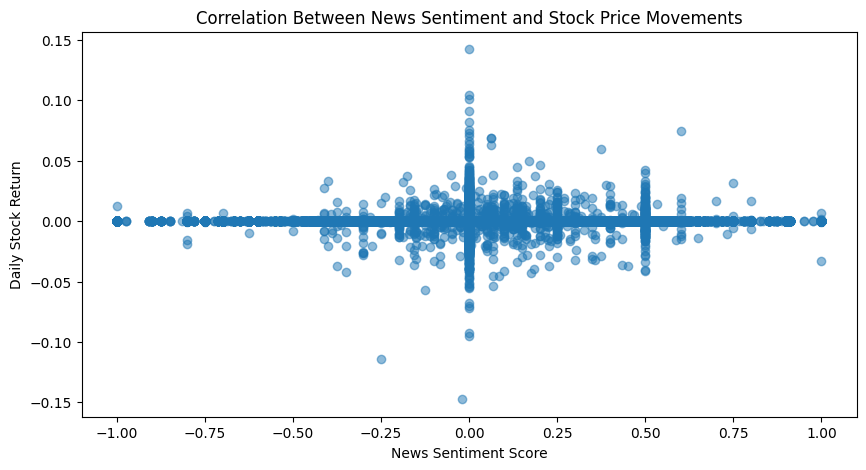

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(valid_data['sentiment'], valid_data['daily_return'], alpha=0.5)
plt.xlabel('News Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.title('Correlation Between News Sentiment and Stock Price Movements')
plt.show()

## 12. Correlation Heatmap
Selects relevant numeric columns, computes the correlation matrix, and visualizes it as a heatmap to show the strength and direction of relationships between variables.

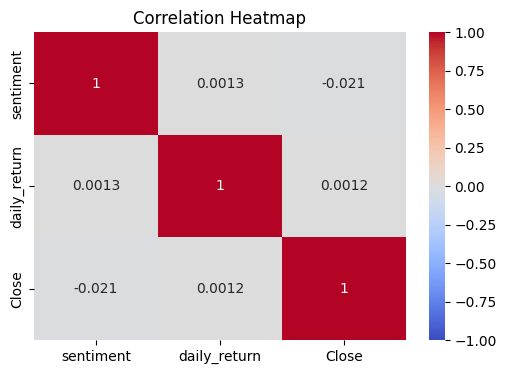

In [25]:
# Select relevant numeric columns for correlation
corr_data = valid_data[['sentiment', 'daily_return', 'Close']]

# Compute correlation matrix
corr_matrix = corr_data.corr(method='pearson')  # You can use 'spearman' or 'kendall' as well

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()